# 식재료 통한 밀키트 레시피 구성

# 1. 데이터 추출

저당식재료 : 100 g 당 총 당류 5g 미만  
저염식재료 : 나트륨 100g당 120㎎ 미만일 때  
고단백 재료 :　단백질 100g 당 6g 이상  
고면역 재료 : 100g 당 아연 8.5mg 이상  
채식은 건너뛰고 바로 검색으로  
저칼로리 재료 : 100g 당 칼로리 40이하

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
%matplotlib inline

In [72]:
dt = pd.read_csv("data/통합 식품영양성분DB_20200824.csv", encoding='CP949')

In [73]:
null_count = dt.isnull().sum()
# null_count

In [74]:
dt["DB군"].value_counts()

가공식품    18746
음식       7374
농축산물     3088
수산물      1366
Name: DB군, dtype: int64

In [75]:
col=dt.columns.tolist()

In [76]:
## 식품군에서 농축산물과 수산물만 추출
dt_g=dt[ dt["DB군"] == "농축산물"].copy()
dt_w=dt[ dt["DB군"] == "수산물"].copy()

In [77]:
## 식품군에서 식품명 정리
dt_g["식품명"] = dt_g["식품명"].map(lambda x : str(x.split(",")[0]))
dt_w["식품명"] = dt_w["식품명"].map(lambda x : str(x.split("-")[0]))

In [78]:
## 데이터프레임 병합
dt_db=pd.concat([dt_g,dt_w])

In [79]:
## 필요한 영양소 추출
dt_ar=dt_db.loc[:, ['식품명','총당류(g)','나트륨(㎎)','단백질(g)','아연(㎎)','에너지(㎉)','칼슘(㎎)','칼륨(㎎)','비타민 C(㎎)','총 식이섬유(g)']]

In [80]:
## 식품명 중복제거
dt_ar = dt_ar.drop_duplicates('식품명', keep='first')
dt_ar = dt_ar.drop_duplicates('식품명', keep='first')
dt_ar=dt_ar[ dt_ar["식품명"] != "감자 튀김"].copy()

In [81]:
dt_ar

,식품명,총당류(g),나트륨(㎎),단백질(g),아연(㎎),에너지(㎉),칼슘(㎎),칼륨(㎎),비타민 C(㎎),총 식이섬유(g)
27486,귀리,0.0,2.0,11.40,0.00,373.0,16.0,574.0,0.0,0.0
27489,기장,0.0,6.0,11.20,0.00,360.0,15.0,233.0,0.0,0.0
27491,메밀,0.5,1.0,13.64,3.09,363.0,21.0,444.0,0.0,6.3
27493,메밀 국수,0.0,455.0,7.59,0.30,291.0,13.0,116.0,0.0,1.9
27497,메밀 냉면,0.0,628.0,10.74,0.77,360.0,27.0,176.0,0.0,3.2
...,...,...,...,...,...,...,...,...,...,...
8728,치어,0.0,0.0,15.60,0.00,0.0,0.0,0.0,0.0,0.0
8731,향어(이스라엘잉어),0.0,0.0,25.80,0.00,0.0,0.0,0.0,0.0,0.0
8733,화살꼴뚜기,0.0,0.0,15.00,0.00,0.0,0.0,0.0,0.0,0.0
8735,황석어(강달이류),0.0,0.0,12.00,0.00,88.0,279.0,0.0,0.0,0.0


In [16]:
dt_ar.to_csv('data/nutrition.csv',encoding='euc-kr')

In [17]:
ns = pd.read_csv("data/부족영양성분.csv", encoding='CP949')
ns=ns.sort_values(by=['19-39'], axis=0)

In [18]:
%matplotlib inline
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

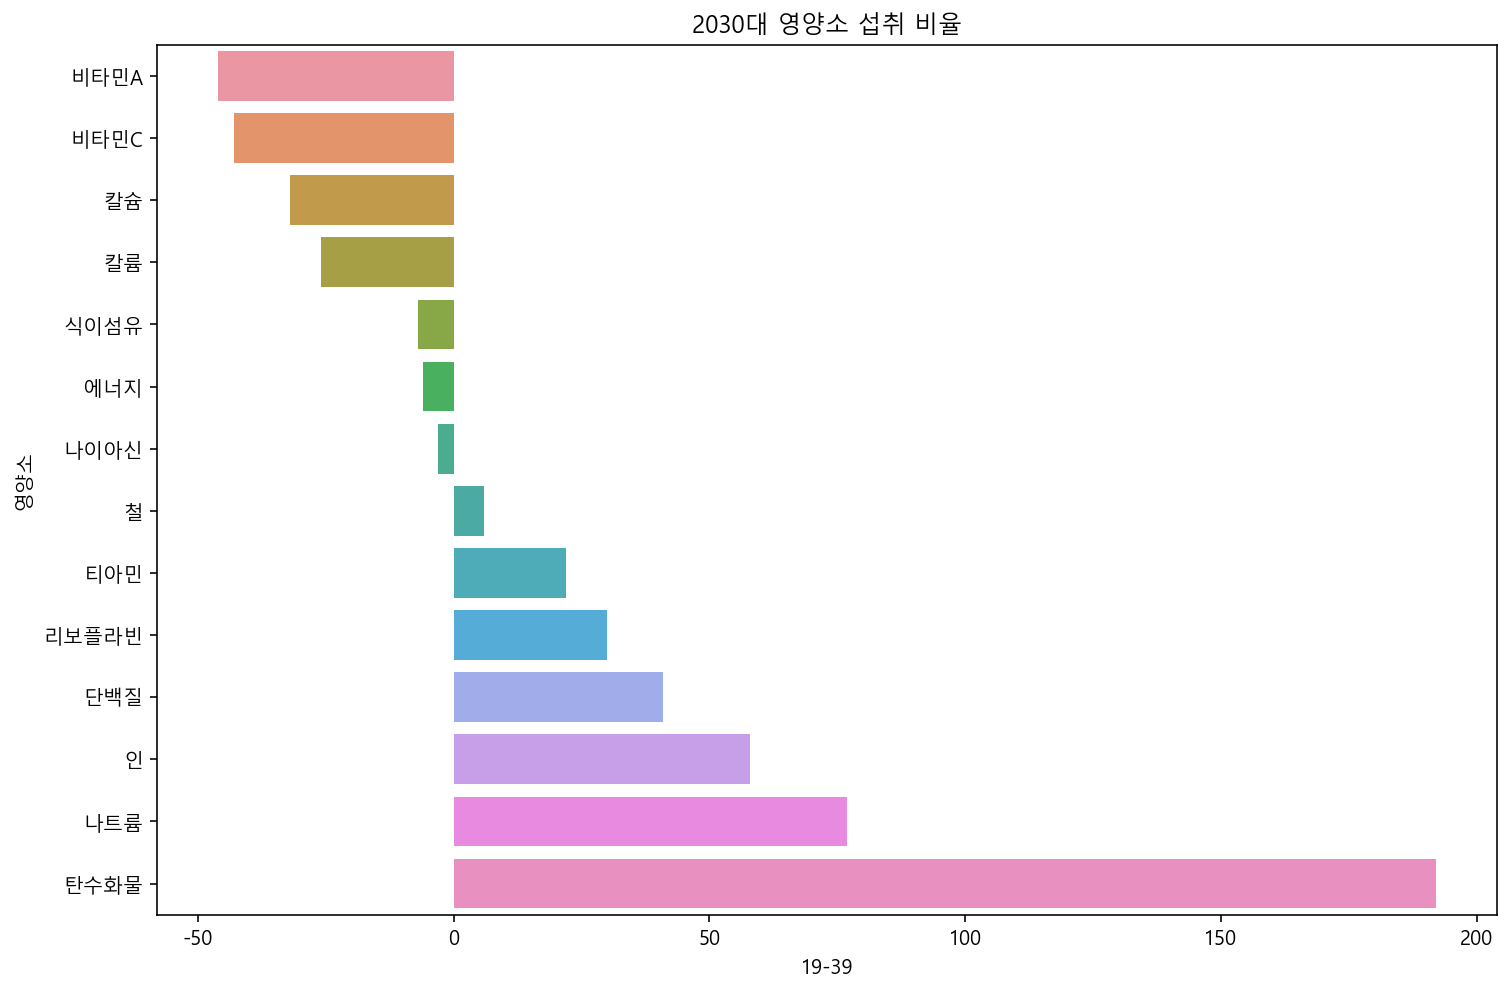

In [20]:
# matplotlib.rcParams['axes.unicode_minus'] = False
sequential_colors = sns.color_palette("RdBu", 10)
sns.set_palette(sequential_colors)
plt.figure(figsize=(12,8))
plt.title("2030대 영양소 섭취 비율")
plt.rc('font', size=12) 
sns.barplot(data=ns, x="19-39",y="영양소")

## -> 부족영양소: 비타민A, 비타민C, 칼슘, 칼륨, 식이섬유

# 2. 영양소 별 정렬

### 1) 당

In [85]:
dt_ar1=dt_ar.loc[:, ['식품명','총당류(g)']]

In [86]:
dt_ar1=dt_ar1[ dt_ar1["총당류(g)"] != 0].copy()
dt_ar1=dt_ar1.sort_values(by=['총당류(g)'], axis=0)

In [87]:
list1=dt_ar1.식품명.tolist()
list1[:6]

['위스키', '녹두묵', '파래', '전분', '헛개차', '보이차']

### 총당류 0을 제외하고 당류가 낮은 순으로 식재료를 뽑으면 식재료에 쓰기 힘든 재료가 많음

### 2) 나트륨

In [27]:
dt_ar2=dt_ar.loc[:, ['식품명','나트륨(㎎)']]
dt_ar2=dt_ar2[ dt_ar2["나트륨(㎎)"] != 0].copy()
dt_ar2=dt_ar2.sort_values(by=['나트륨(㎎)'], axis=0)
list2=dt_ar2.식품명.tolist()
# list2[:40]

### 3) 단백질

In [28]:
dt_ar3=dt_ar.loc[:, ['식품명','단백질(g)']]
dt_ar3=dt_ar3[ dt_ar3["단백질(g)"] != 0].copy()
dt_ar3=dt_ar3.sort_values(by=['단백질(g)'], axis=0)
list3=dt_ar3.식품명.tolist()
# list3[:100]

### 4) 아연

In [29]:
dt_ar4=dt_ar.loc[:, ['식품명','아연(㎎)']]
dt_ar4=dt_ar4[ dt_ar4["아연(㎎)"] != 0].copy()
dt_ar4=dt_ar4.sort_values(by=['아연(㎎)'], axis=0)
list4=dt_ar4.식품명.tolist()
# list4[:100]

### 5) 에너지

In [30]:
dt_ar5=dt_ar.loc[:, ['식품명','에너지(㎉)']]
dt_ar5=dt_ar5[ dt_ar5["에너지(㎉)"] != 0].copy()
dt_ar5=dt_ar5.sort_values(by=['에너지(㎉)'], axis=0)
list5=dt_ar5.식품명.tolist()
# list5[:100]

## 3. 최종 리스트 생성
### 2030대에게 부족한 영양소 이용해 식재료 다시 추출
### 점수=총당류**0.5+부족영양소**0.5

In [82]:
abc=dt_ar

In [83]:
dt_ar["칼슘(㎎)"]=dt_ar["칼슘(㎎)"]/(750/3)*100
dt_ar["칼륨(㎎)"]=dt_ar["칼륨(㎎)"]/(3500/3)*100
dt_ar["비타민 C(㎎)"]=dt_ar["비타민 C(㎎)"]/(100/3)*100
dt_ar["총 식이섬유(g)"]=dt_ar["총 식이섬유(g)"]/(25/3)*100

In [84]:
#dt_ar

In [88]:
dt_la1=dt_ar.loc[:, ['식품명','총당류(g)','칼슘(㎎)','칼륨(㎎)','비타민 C(㎎)','총 식이섬유(g)']]
dt_la1=dt_la1[ dt_la1["총당류(g)"] != 0].copy()
dt_la1["최종치"]=(100-(dt_la1["총당류(g)"]/(5/3)*100))*0.5+(dt_la1["칼슘(㎎)"]+dt_la1["칼륨(㎎)"]+dt_la1["비타민 C(㎎)"]+dt_la1["총 식이섬유(g)"])*0.5

In [89]:
dt_la1["최종치"]=(dt_la1["최종치"]-100)*(dt_la1["최종치"]-100)
dt_la1=dt_la1.sort_values(by=['최종치'], axis=0)
dt_la1_head=dt_la1.head()

In [90]:
dt_la1

,식품명,총당류(g),칼슘(㎎),칼륨(㎎),비타민 C(㎎),총 식이섬유(g),최종치
27904,렌즈콩(렌틸콩),2.01,10.400000,8.005714e+01,0.00,126.0,4.290816e+00
27912,잠두,5.70,41.200000,9.102857e+01,4.20,300.0,7.760204e+00
28081,고추,1.80,6.000000,2.314286e+01,131.85,52.8,8.389298e+00
28104,곰취,1.10,54.000000,4.534286e+01,23.91,49.2,1.040984e+01
28200,마늘,0.23,4.800000,4.551429e+01,25.35,45.6,1.392889e+01
...,...,...,...,...,...,...,...
27845,꿀,72.60,0.400000,1.542857e+00,0.00,0.0,4.959656e+06
27870,젤라틴,86.04,1.200000,6.000000e-01,0.00,0.0,6.918478e+06
27885,포도당,88.30,0.000004,8.571429e-07,0.00,0.0,7.284601e+06
27861,설탕,97.81,0.400000,1.714286e-01,0.00,0.0,8.904341e+06


## 4. 필요 식재료 추출

In [91]:
llist1=dt_la1.식품명.tolist()
llist1[:20]

['렌즈콩(렌틸콩)',
 '잠두',
 '고추',
 '곰취',
 '마늘',
 '메밀',
 '아티초크',
 '퀴노아',
 '삼붕냐와',
 '구기자',
 '바질잎',
 '만두',
 '초석잠',
 '무 절임',
 '부지갱이(섬쑥부쟁이)',
 '레몬',
 '유자',
 '머위',
 '호밀',
 '브로콜리']

In [92]:
dt_ac=dt_db.loc[:, ['식품명','탄수화물(g)','지방(g)','단백질(g)','칼슘(㎎)','칼륨(㎎)','칼슘(㎎)','철(㎎)','비타민 B2(㎎)','비타민 C(g)','총 식이섬유(g)']]
dt_ac1=dt_ac[ dt_ac["식품명"] == "렌즈콩(렌틸콩)"].copy()
dt_ac2=dt_ac[ dt_ac["식품명"] == "위스키"].copy()
dt_ac3=dt_ac[ dt_ac["식품명"] == "녹두묵"].copy()

In [93]:
dt_acc=pd.concat([dt_ac1,dt_ac2,dt_ac3])
dt_acc = dt_acc.drop_duplicates('식품명', keep='first')

In [94]:
dt = pd.read_csv("data/finaldata.csv", encoding='CP949')
dt.shape

(24, 3)

## 처음 추출한 식재료와 나중 추출한 식재료 비교

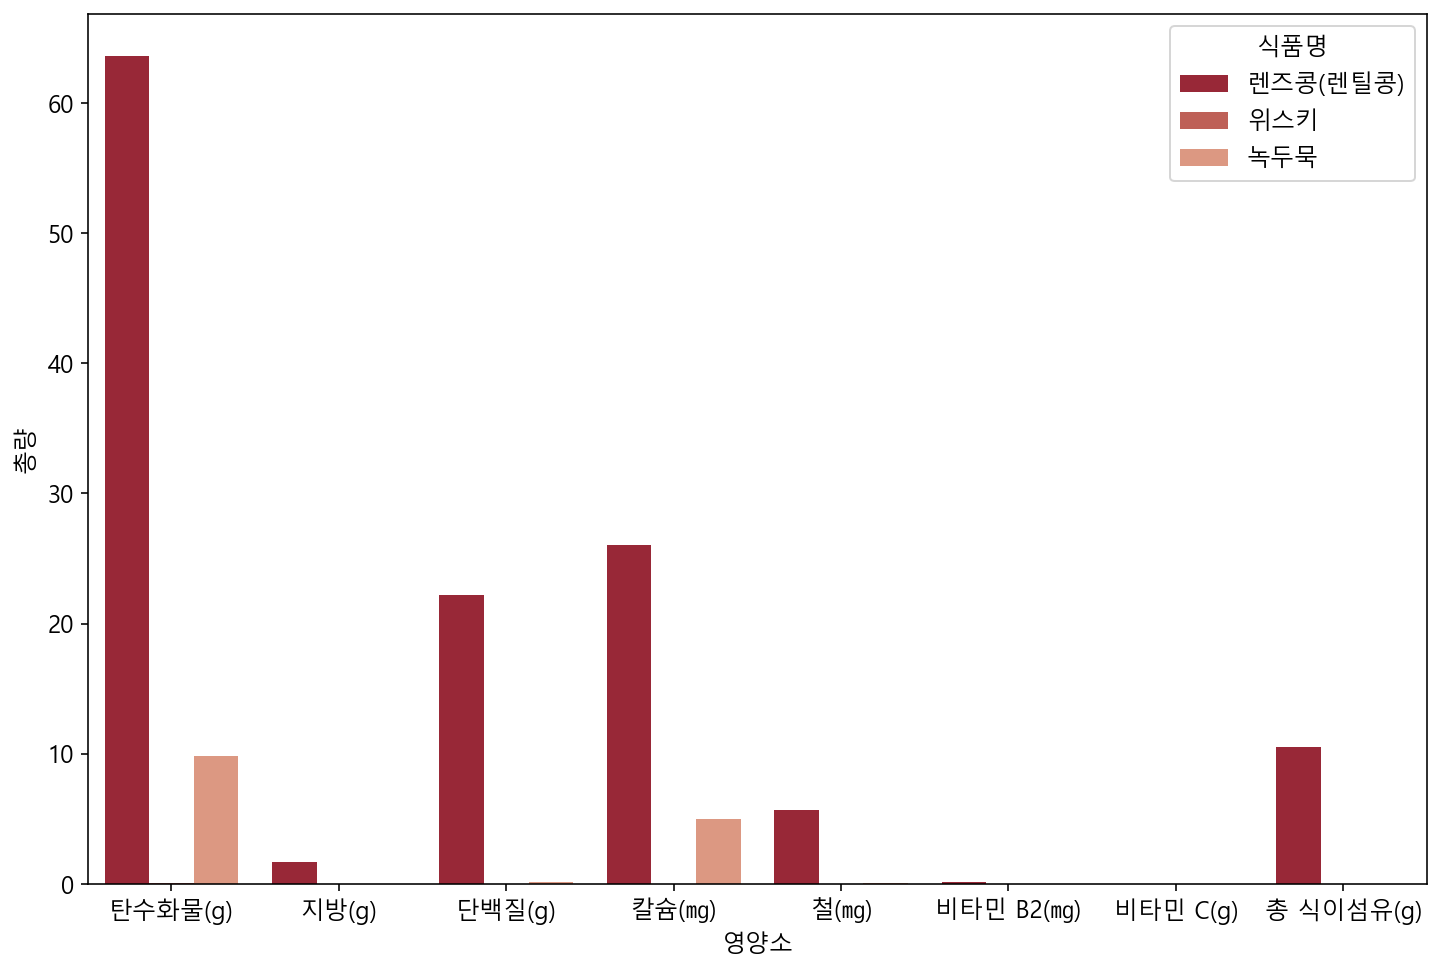

In [99]:
plt.figure(figsize=(12,8))
sequential_colors = sns.color_palette("RdBu", 10)
sns.set_palette(sequential_colors)
plt.rc('font', size=12) 
sns.barplot(data=dt, x="영양소",y='총량', hue='식품명')

## 5. 만개의 레시피 크롤링

In [100]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint
# webpage = requests.get("https://www.10000recipe.com/recipe/6919794")
# soup = BeautifulSoup(webpage.content, "html.parser")
# print(soup)

In [102]:
html = requests.get('https://www.10000recipe.com/recipe/6919794')
# pprint(html.text)
soup = BeautifulSoup(html.text, 'html.parser')
data1 = soup.find('div', {'class':'view_step'})

In [103]:
data2=data1.find_all('div',{'class':'media-body'})
print(data2)
# try:
#     for n in data1.find('div',{'class':'media-body'}):
#         print(n)

[<div class="media-body" id="stepdescr1">참치캔을 따서 채반에 넣고 기름을 쪽 빼주세요.</div>, <div class="media-body" id="stepdescr2">단무지는 잘게잘게 다져주세요.<p class="step_add add_tip2">오독오독 식감 일품! <br>
없어도 무방!</br></p></div>, <div class="media-body" id="stepdescr3">큰 볼에 다진단무지, 기름뺀 참치를 넣고 (밥숟가락)설탕 반스푼, 마요네즈 2큰술, 후춧가루 적당히 넣고 비벼주세요</div>, <div class="media-body" id="stepdescr4">밥 1공기를 넣고 간장 반스푼 통깨 팍팍 넣고 다시 한번 잘 비벼주세요.</div>, <div class="media-body" id="stepdescr5">도시락 김을 뜯어서 밥한숟가락 떠서 돌돌 말아주세요.</div>, <div class="media-body" id="stepdescr6">이대로 냠냠해도 꿀맛!<br/>
눈으로 한입~ 마요네즈로 플레이팅!</div>]


In [104]:
for i in data2:
    print(i.text)

참치캔을 따서 채반에 넣고 기름을 쪽 빼주세요.
단무지는 잘게잘게 다져주세요.오독오독 식감 일품! 
없어도 무방!
큰 볼에 다진단무지, 기름뺀 참치를 넣고 (밥숟가락)설탕 반스푼, 마요네즈 2큰술, 후춧가루 적당히 넣고 비벼주세요
밥 1공기를 넣고 간장 반스푼 통깨 팍팍 넣고 다시 한번 잘 비벼주세요.
도시락 김을 뜯어서 밥한숟가락 떠서 돌돌 말아주세요.
이대로 냠냠해도 꿀맛!
눈으로 한입~ 마요네즈로 플레이팅!


In [105]:
import urllib.request
## url 통해서 한페이지의 제목과 레시피 크롤링

def OnePageCrawler(recipeUrl):
    url='https://www.10000recipe.com'+recipeUrl
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    
    title = soup.find('div', {'class':'view2_summary'})
    title_txt = title.find('h3')
    titlename=title_txt.text
#     print("이름: "+titlename)
#     print()
    f.write("이름: "+titlename+'\n')
    
    ingre = soup.find('ul', {'class':'case1'})
    if(str(type(ingre))!="<class 'NoneType'>"):
        ingre_txt=ingre.find_all('li') # 재료 관련 데이터 묶어서 오브젝트로
#         ingre_txt=ingre.find_all('span', {'class':'ingre_unit'}) # 재료 관련 데이터 묶어서 오브젝트로
        for i in ingre_txt:
#             print(i.text)
            f.write(i.text+'\n')
        f.write('\n')
    
    recipe = soup.find('div', {'class':'view_step'})
    recipe_txt=recipe.find_all('div',{'class':'media-body'}) # 레시피 관련 데이터 묶어서 오브젝트로
    for i in recipe_txt:
#         print(i.text)
        f.write(i.text+'\n')
    f.write('\n')
    
## 음식 이름으로 찾기
def Search(name):
    url='https://www.10000recipe.com/recipe/list.html?q='+name
    html = requests.get(url)
    soup = BeautifulSoup(html.text, "html.parser")
    
    i=0
    for href in soup.find("ul", class_="common_sp_list_ul ea4").find_all("li"):
        OnePageCrawler(href.find("a")["href"])
        i+=1
        if i==3:
            break

## 5. 태그 데이터 크롤링

In [330]:
import urllib.request
## url 통해서 한페이지의 제목과 레시피 크롤링

def OnePageCrawler(recipeUrl):
    url='https://www.10000recipe.com'+recipeUrl
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')

    tag = soup.find('div', {'class':'view_tag'})
    line=[]
    if(str(type(tag))!="<class 'NoneType'>"):
        tag_txt=tag.find_all('a') # 재료 관련 데이터 묶어서 오브젝트로
        for i in tag_txt:
#             print(i.text)
            line.append(i.text)
    tagdata.append(line)
    
def Search(page):
#     url='https://www.10000recipe.com/recipe/list.html?order=reco&page='+page
    url='https://www.10000recipe.com/recipe/list.html?q=%EC%95%84%EC%B9%A8&order=reco&page='+page
    html = requests.get(url)
    soup = BeautifulSoup(html.text, "html.parser")
    
    for href in soup.find("ul", class_="common_sp_list_ul ea4").find_all("li"):
        OnePageCrawler(href.find("a")["href"])

In [329]:
id1=[]
id2=[]
for i in range(1,16)
    url='https://www.10000recipe.com/recipe/list.html?q=%EC%95%84%EC%B9%A8&order=reco&page='+i
    html = requests.get(url)
    soup = BeautifulSoup(html.text, "html.parser")

    for href in soup.find("ul", class_="common_sp_list_ul ea4").find_all("li"):
        id1+=href.find("a")["href"]

NameError: name 'page' is not defined